<a href="https://colab.research.google.com/github/Areeb-Sohail/A.I-for-Engineers/blob/main/Classification_of_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('user_behavior_dataset.csv')
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Device Model"] = le.fit_transform(data["Device Model"])
data.head(2)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,Android,393,6.4,1872,67,1122,40,Male,4
1,2,1,Android,268,4.7,1331,42,944,47,Female,3


In [ ]:
data = data.drop(["Operating System","Gender"], axis = 1)
data.head()

,User ID,Device Model,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,1,0,393,6.4,1872,67,1122,40,4
1,2,1,268,4.7,1331,42,944,47,3
2,3,3,154,4.0,761,32,322,42,2
3,4,0,239,4.8,1676,56,871,20,3
4,5,4,187,4.3,1367,58,988,31,3


In [ ]:
# Importing Train Test Split Function
from sklearn.model_selection import train_test_split
# Copying the df into another variable (not necessary)
df2 = data.copy()
# Creating X and Y out of the dataframe
x = df2.drop(['Device Model'],axis='columns')
y = df2["Device Model"]

# Alternate way to split the dataset into x and y
# x = df2.iloc[:,:-1]
# y = df2.iloc[:, -1]

# Splitting X and Y into train test sets
x_train,x_test,y_train,y_test=\
train_test_split(x,y,test_size=0.20,random_state=48)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy    : 24.82 %
Model Accuracy Score : 20.71 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.20      0.32      0.24        25
           1       0.29      0.08      0.13        24
           2       0.15      0.12      0.13        26
           3       0.21      0.16      0.18        37
           4       0.23      0.36      0.28        28

    accuracy                           0.21       140
   macro avg       0.21      0.21      0.19       140
weighted avg       0.21      0.21      0.19       140

--------------------------------------------------------


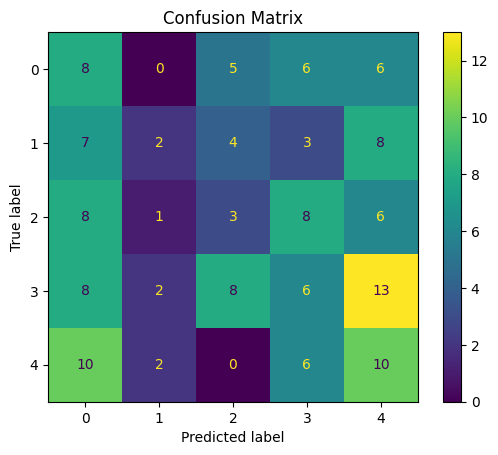

In [ ]:
# Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Storing it inside a variable
logreg = LogisticRegression()
# Fitting the model to train set
logreg.fit(x_train,y_train)
# Using the model to predict the y using x_test
y_pred_lr = logreg.predict(x_test)
# Train And Test Accuracy
log_train_accuracy = round(logreg.score(x_train, y_train) * 100, 2)
log_test_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
print("Training Accuracy    :",log_train_accuracy ,"%")
print("Model Accuracy Score :",log_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
# Detailed Report - F1 Score etc
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 22.14 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.18      0.24      0.20        25
           1       0.25      0.25      0.25        24
           2       0.25      0.35      0.29        26
           3       0.30      0.16      0.21        37
           4       0.15      0.14      0.15        28

    accuracy                           0.22       140
   macro avg       0.23      0.23      0.22       140
weighted avg       0.23      0.22      0.22       140

--------------------------------------------------------


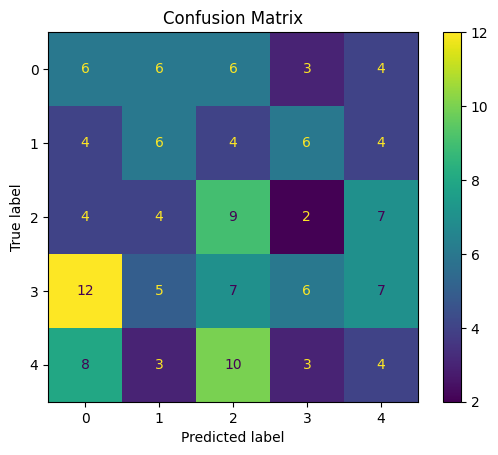

In [ ]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Storing it inside a variable
dt = DecisionTreeClassifier()
# Fitting the model to train set
dt.fit(x_train,y_train)
# Using the model to predict the y using x_test
y_pred_dt = dt.predict(x_test)
# Train And Test Accuracy
dt_train_accuracy = round(dt.score(x_train, y_train) * 100, 2)
dt_test_accuracy = round(accuracy_score(y_pred_dt, y_test) * 100, 2)
print("Training Accuracy    :",dt_train_accuracy ,"%")
print("Model Accuracy Score :",dt_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
# Detailed Report - F1 Score etc
print("Classification_Report: \n",classification_report(y_test,y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 15.71 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.11      0.16      0.13        25
           1       0.11      0.12      0.12        24
           2       0.22      0.31      0.26        26
           3       0.23      0.08      0.12        37
           4       0.15      0.14      0.15        28

    accuracy                           0.16       140
   macro avg       0.16      0.16      0.15       140
weighted avg       0.17      0.16      0.15       140

--------------------------------------------------------


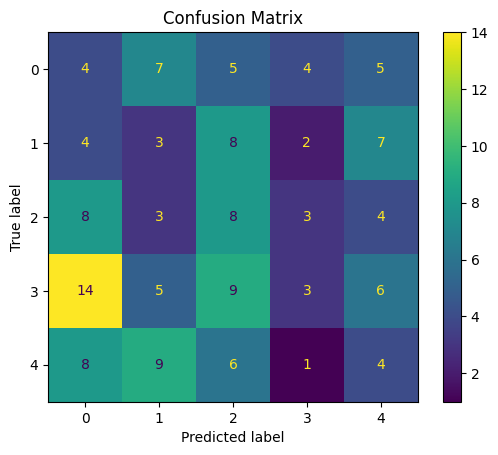

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_train_accuracy = round(rf.score(x_train, y_train) * 100, 2)
rf_test_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
print("Training Accuracy    :",rf_train_accuracy ,"%")
print("Model Accuracy Score :",rf_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 35.54 %
Model Accuracy Score : 22.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.18      0.40      0.25        25
           1       0.25      0.29      0.27        24
           2       0.15      0.08      0.10        26
           3       0.30      0.35      0.32        37
           4       0.00      0.00      0.00        28

    accuracy                           0.23       140
   macro avg       0.18      0.22      0.19       140
weighted avg       0.18      0.23      0.19       140

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


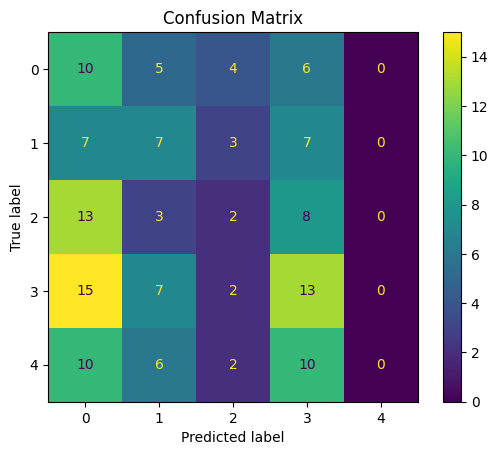

In [ ]:
# Importing ANN MLP Classifiers
from sklearn.neural_network import MLPClassifier
# Storing it inside a variable
ANN = MLPClassifier(random_state=1, max_iter=3000, hidden_layer_sizes=(1000,),
                    activation='relu', solver='adam', alpha=0.0001, batch_size='auto', momentum=0.9,
                    learning_rate_init=0.0001, shuffle=True, verbose=False)
# Fitting the model to train set
ANN.fit(x_train,y_train)
# Using the model to predict the y using x_test
y_pred_ANN = ANN.predict(x_test)
# Train And Test Accuracy
ANN_train_accuracy = round(ANN.score(x_train, y_train) * 100, 2)
ANN_test_accuracy = round(accuracy_score(y_pred_ANN, y_test) * 100, 2)
print("Training Accuracy    :",ANN_train_accuracy ,"%")
print("Model Accuracy Score :",ANN_test_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
# Detailed Report - F1 Score etc
print("Classification_Report: \n",classification_report(y_test,y_pred_ANN))
print("\033[1m--------------------------------------------------------\033[0m")
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(ANN, x_test, y_test);
plt.title('Confusion Matrix');